# Data and model understanding

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

###1. Upload, understand, and clean data

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Read data
car_kick = pd.read_csv("/car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [3]:
car_kick.keys()

Index(['PurchDate', 'VehYear', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost', 'Auction', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1',
       'VNST', 'IsOnlineSale', 'IsBadBuy'],
      dtype='object')

In [4]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
carAuction = car_kick [desired_columns]

In [5]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,0,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,0,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,0,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,0,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,0,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [6]:
# Examine missing values again
carAuction.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [7]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                          int64
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [8]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].replace({1:'Yes', 0:'No'})

/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_22410/3990515223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carAuction['IsBadBuy'] = carAuction['IsBadBuy'].replace({1:'Yes', 0:'No'})


In [9]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_22410/3542912763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carAuction['Auction'] = carAuction['Auction'].astype('category')
/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_22410/3542912763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carAuction['Color'] = carAuction['Color'].astype('category')
/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_22410/3542912763.py:4: SettingWithCopyWarning: 
A value is trying to be

In [10]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

In [11]:
# Display all numeric variables
carAuction.select_dtypes(include=['number'])

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
0,5341,6500,4,51954,1086
1,3688,3680,4,89127,983
2,6868,7170,3,71271,1974
3,7801,7670,2,83338,2152
4,7355,7165,2,58698,1500
...,...,...,...,...,...
67206,6326,6680,2,56072,1086
67207,7505,8265,6,94232,909
67208,3106,4950,6,79534,1506
67209,3534,5220,7,79394,3967


In [12]:
# Display all categorical variables
carAuction.select_dtypes(include=['category'])

,Auction,Color,IsBadBuy,Size,TopThreeAmericanName,WheelType
0,MANHEIM,SILVER,No,MEDIUM,CHRYSLER,Covers
1,ADESA,SILVER,No,MEDIUM,FORD,Covers
2,MANHEIM,RED,No,LARGE,GM,Alloy
3,MANHEIM,BLACK,No,LARGE,GM,Covers
4,ADESA,WHITE,No,LARGE,GM,Alloy
...,...,...,...,...,...,...
67206,MANHEIM,RED,Yes,MEDIUM,CHRYSLER,Covers
67207,ADESA,BLACK,Yes,'MEDIUM SUV',OTHER,Alloy
67208,ADESA,GOLD,Yes,MEDIUM,GM,Alloy
67209,MANHEIM,WHITE,Yes,'MEDIUM SUV',GM,Covers


In [13]:
# Show the statistics of VehOdo
carAuction['VehOdo'].describe()

count     67211.000000
mean      71734.558971
std       14387.245482
min        5368.000000
25%       62163.000000
50%       73530.000000
75%       82530.000000
max      115717.000000
Name: VehOdo, dtype: float64

In [14]:
# Obtain the variance, standard deviation, and range of WarrantyCost
print("variance: ", carAuction['WarrantyCost'].var(), "standard deviation: ", carAuction['WarrantyCost'].std(), "range: ", carAuction['WarrantyCost'].min(), carAuction['WarrantyCost'].max())

variance:  335331.08427681215 standard deviation:  579.0777877598243 range:  462 7498


In [15]:
# Display the IQR of WarrantyCost
IQR = carAuction['WarrantyCost'].quantile(0.75) - carAuction['WarrantyCost'].quantile(0.25)
print("IQR:", IQR)

IQR: 770.0


Text(0.5, 1.0, 'Boxplot of VehBCost in the carAuction data set')

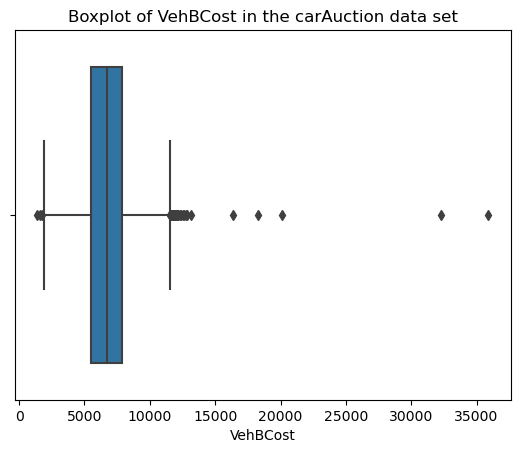

In [16]:
# Boxplot of a numeric variable: VehBCost
snsplot = sns.boxplot(x='VehBCost', data = carAuction)
snsplot.set_title("Boxplot of VehBCost in the carAuction data set")

Text(0.5, 1.0, 'Boxplot of VehicleAge in the carAuction data set')

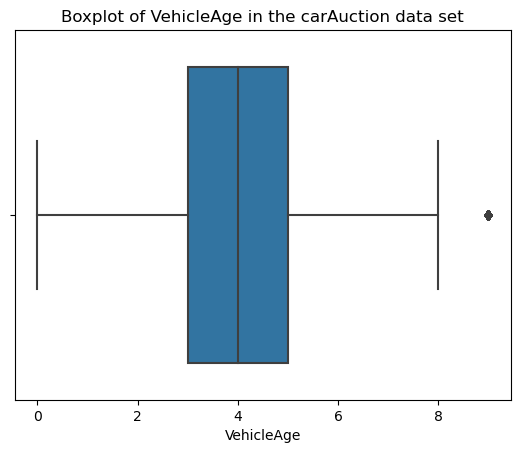

In [17]:
# Boxplot of a numeric variable: VehicleAge
snsplot = sns.boxplot(x='VehicleAge', data = carAuction)
snsplot.set_title("Boxplot of VehicleAge in the carAuction data set")

Text(0.5, 1.0, 'Histogram of VehOdo in the carAuction data set')

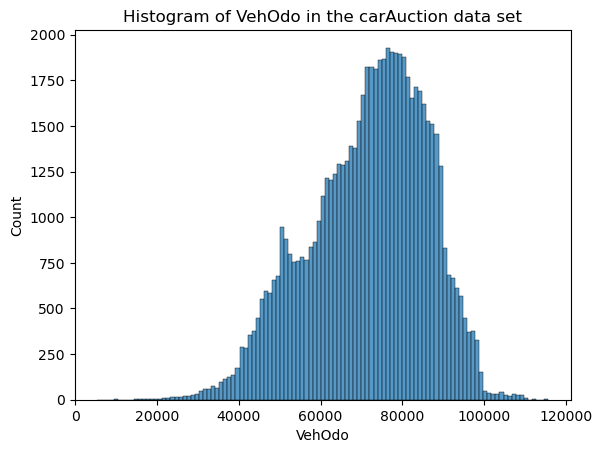

In [18]:
# Histogram of a numeric variable: VehOdo
snsplot = sns.histplot(x='VehOdo', data = carAuction)
snsplot.set_title("Histogram of VehOdo in the carAuction data set")

###3. Understanding a single variable: categorical variables

In [19]:
# Display the number of cars in different WheelType
carAuction['WheelType'].value_counts()

Alloy      34780
Covers     31701
Special      730
Name: WheelType, dtype: int64

In [20]:
# Display the proportion of cars in different WheelType
carAuction['WheelType'].value_counts(normalize=True)

Alloy      0.517475
Covers     0.471664
Special    0.010861
Name: WheelType, dtype: float64

Text(0.5, 1.0, 'Countplot of WheelType in the carAuction data set')

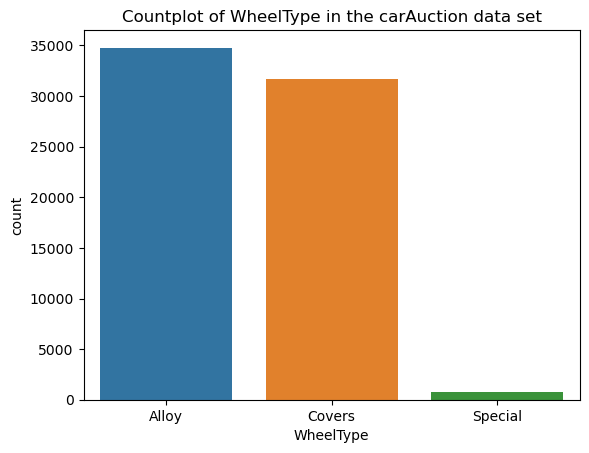

In [21]:
# Plot a categorical variable: WheelType
snsplot = sns.countplot(x='WheelType', data=carAuction)
snsplot.set_title("Countplot of WheelType in the carAuction data set")

### 4. Understand relationships of multiple variables

Text(0.5, 1.0, 'Scatterplot of VehBCost and MMRCurrentAuctionAveragePrice')

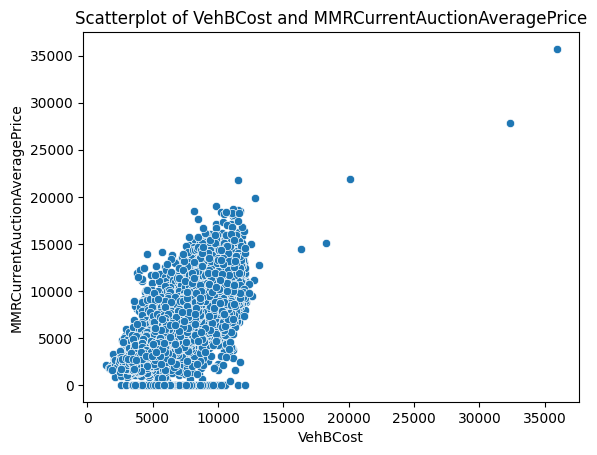

In [27]:
# scatter plot two numeric variables: VehBCost and MMRCurrentAuctionAveragePrice
snsplot = sns.scatterplot(x='VehBCost', y= 'MMRCurrentAuctionAveragePrice', data=carAuction)
snsplot.set_title("Scatterplot of VehBCost and MMRCurrentAuctionAveragePrice")

In [28]:
# Generate correlation coefficients of two numeric variables in a 2x2 matrix: VehBCost and MMRCurrentAuctionAveragePrice
carAuction[['VehBCost','MMRCurrentAuctionAveragePrice']].corr()

,VehBCost,MMRCurrentAuctionAveragePrice
VehBCost,1.000000,0.775695
MMRCurrentAuctionAveragePrice,0.775695,1.000000


In [29]:
# Generate the correlation matrix of all numeric variables
carAuction.corr()

ValueError: could not convert string to float: 'Covers'

In [ ]:
# Examine relationships between numeric and categorical variables: boxplot VehBCost based on IsBadBuy
snsplot = sns.boxplot(x='VehBCost', y= 'IsBadBuy', data = carAuction)
snsplot.set_title("Boxplot of VehBCost based on IsBadBuy")

###5. Partition the data set for Decision Tree model

In [30]:
# Create dummy variables (0.5 pts)
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,No,3688,3680,4,89127,983,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,No,6868,7170,3,71271,1974,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,No,7801,7670,2,83338,2152,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
4,No,7355,7165,2,58698,1500,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,Yes,6326,6680,2,56072,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
67207,Yes,7505,8265,6,94232,909,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
67208,Yes,3106,4950,6,79534,1506,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
67209,Yes,3534,5220,7,79394,3967,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [31]:
# Examine the porportion of target variable for data set
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

IsBadBuy
No     0.904539
Yes    0.095461
Name: proportion, dtype: float64


In [32]:
# Partition the data (0.5 pts)
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(47047, 38) (20164, 38) (47047,) (20164,)


In [33]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=62)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=62)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [34]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

IsBadBuy
No     0.5
Yes    0.5
Name: proportion, dtype: float64 (8838,)


In [35]:
# Examine the porportion of target variable for testing data set (0.5 pts)
print(target_test.value_counts(normalize=True))

IsBadBuy
No     0.900962
Yes    0.099038
Name: proportion, dtype: float64


## 6. Decision Tree model prediction

In [36]:
# Build a decision tree model on training data with max_depth = 2 (0.5 pts)
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5, 0.875, 'VehicleAge <= 4.5\nentropy = 1.0\nsamples = 8838\nvalue = [4419, 4419]\nclass = No'),
 Text(0.25, 0.625, 'VehicleAge <= 2.5\nentropy = 0.961\nsamples = 4524\nvalue = [2787, 1737]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'VehBCost <= 6095.0\nentropy = 0.831\nsamples = 1005\nvalue = [741, 264]\nclass = No'),
 Text(0.0625, 0.125, 'entropy = 1.0\nsamples = 87\nvalue = [43.0, 44.0]\nclass = Yes'),
 Text(0.1875, 0.125, 'entropy = 0.794\nsamples = 918\nvalue = [698, 220]\nclass = No'),
 Text(0.375, 0.375, 'VehBCost <= 4562.5\nentropy = 0.981\nsamples = 3519\nvalue = [2046, 1473]\nclass = No'),
 Text(0.3125, 0.125, 'entropy = 0.964\nsamples = 244\nvalue = [95, 149]\nclass = Yes'),
 Text(0.4375, 0.125, 'entropy = 0.973\nsamples = 3275\nvalue = [1951, 1324]\nclass = No'),
 Text(0.75, 0.625, 'VehicleAge <= 6.5\nentropy = 0.957\nsamples = 4314\nvalue = [1632, 2682]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'VehBCost <= 4687.5\nent

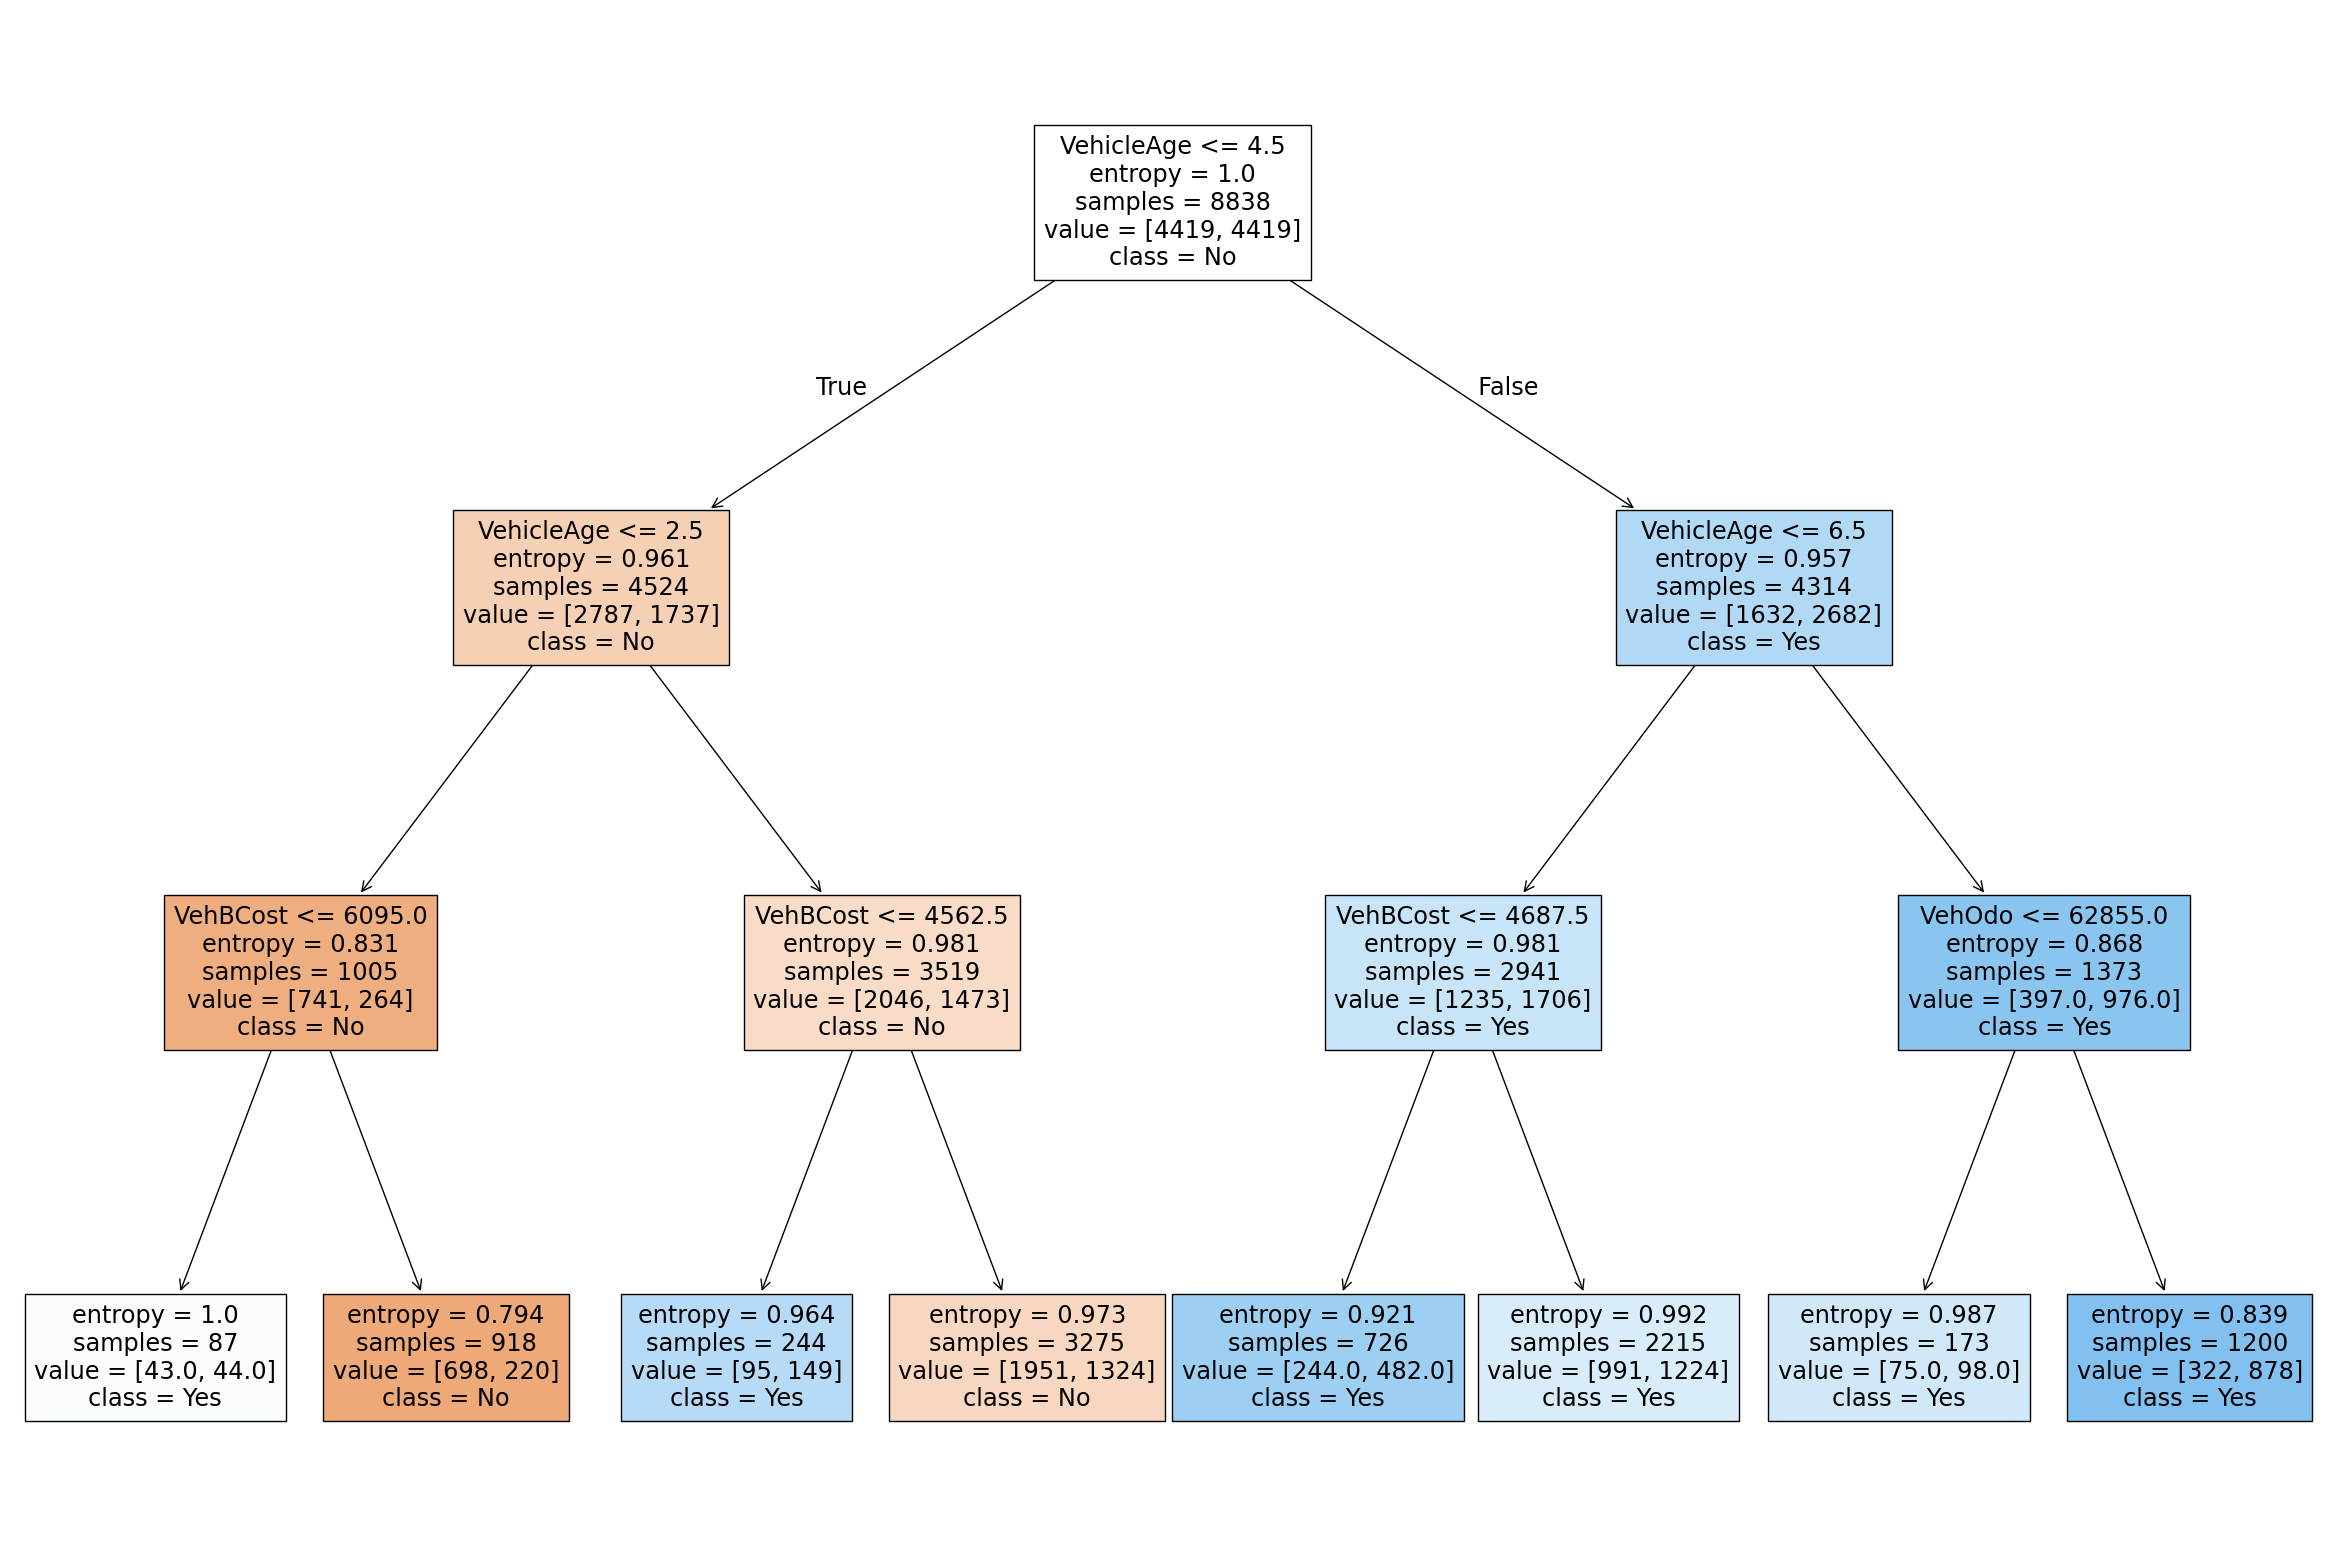

In [37]:
# Plot the tree (0.5 pts)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [38]:
# Text version of decision tree
print(tree.export_text(model, feature_names=list(carAuction.columns)[1:]))

|--- VehicleAge <= 4.50
|   |--- VehicleAge <= 2.50
|   |   |--- VehBCost <= 6095.00
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  6095.00
|   |   |   |--- class: No
|   |--- VehicleAge >  2.50
|   |   |--- VehBCost <= 4562.50
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  4562.50
|   |   |   |--- class: No
|--- VehicleAge >  4.50
|   |--- VehicleAge <= 6.50
|   |   |--- VehBCost <= 4687.50
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  4687.50
|   |   |   |--- class: Yes
|   |--- VehicleAge >  6.50
|   |   |--- VehOdo <= 62855.00
|   |   |   |--- class: Yes
|   |   |--- VehOdo >  62855.00
|   |   |   |--- class: Yes



Q1. How many decision nodes and how many leaf nodes are in the tree?  (0.5 pts)<br>


Q2. Compare to a decision tree with 7 decision nodes and 8 leaf nodes, is it more or less complex? Give reasons for your answer. (1 pt)<br>


Q3. What is the predictor that first splits the tree? How the decision tree selects the first predictor to split? (1 pt)<br>


Q4. Find one path in the tree to a leaf node that is classified to IsBadBuy = 'Yes'. What is this path/rule's misclassification error rate? (1 pt)<br>

In [39]:
# Make predictions on testing data
prediction_on_test = model.predict(predictors_test)

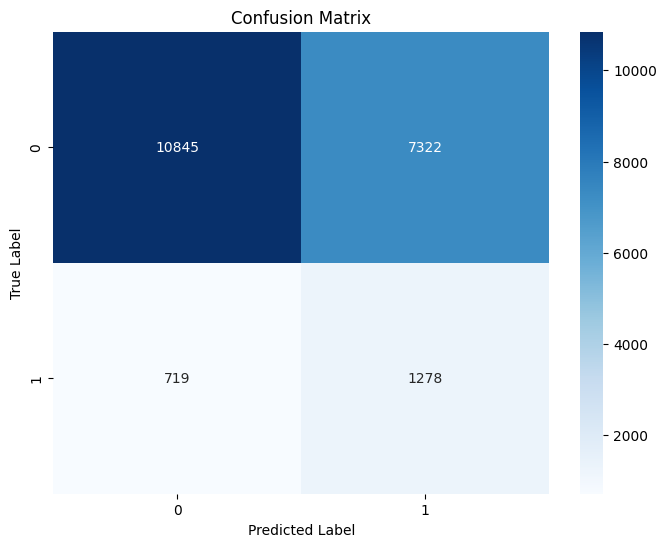

In [40]:
# Examine the evaluation results on testing data: confusion_matrix

#plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

# Compute confusion matrix
cm = confusion_matrix(target_test, prediction_on_test)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Q5. On the testing set, how many bad buy cars are predicted as Not bad buy? (0.5 pts)<br>


In [41]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 pts)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.94      0.60      0.73     18167
         Yes       0.15      0.64      0.24      1997

    accuracy                           0.60     20164
   macro avg       0.54      0.62      0.49     20164
weighted avg       0.86      0.60      0.68     20164



Q6. Does the decision tree model have better performance on majority (IsBadBuy = 'No') or minority class (IsBadBuy = 'Yes')? why? (1 pt)<br>

Q7. How do you evaluate the model? Is it good or bad? why? can we improve it? how? (2 pts)


In [42]:
!jupyter nbconvert --to html "/content/drive/MyDrive/IS470_lab/IS675_lab02.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/IS470_lab/IS675_lab02.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the 